# **<center>Stock Price Prediction with Technical & Fundamental Analysis</center>**
**Stock**
* Stocks, each unit of which is called a share, represent ownership of a company. Stocks, owned either directly or through a mutual fund or ETF, will likely form the majority of most investor’s portfolios. 

In [1]:
# !pip install --upgrade pandas-datareader
# !pip install --upgrade pandas
# !pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as data
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
 df = yf.download("ADANIENT.NS", start="2010-01-01", end="2023-02-12")
 df=df.round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.sort_values(by ='Date', ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-10 00:00:00+05:30,1769.00,1990.00,1733.15,1846.95,1846.95,11334878
2023-02-09 00:00:00+05:30,2168.00,2168.00,1731.40,1925.70,1925.70,18279862
2023-02-08 00:00:00+05:30,1869.85,2222.15,1840.85,2164.25,2164.25,19173006
2023-02-07 00:00:00+05:30,1571.00,1962.70,1525.60,1802.95,1802.95,19188072
2023-02-06 00:00:00+05:30,1575.00,1615.00,1435.20,1572.70,1572.70,19308603


### **Key Definitions**
**Open:** The opening price of a stock at the beginning of a trading day.

**High:** The highest price a stock reaches during a trading day.

**Low:** The lowest price a stock reaches during a trading day.

**Close:** The closing price of a stock at the end of a trading day.

**Adj Close:** The adjusted closing price of a stock, which takes into account any dividends, stock splits, or other corporate actions that occurred during the day.

**Volume:** The number of shares of a stock that were traded during a particular trading day. This is an important indicator of market activity and can provide insight into the level of buying and selling interest in a particular stock.

In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06 00:00:00+05:30,1575.00,1615.00,1435.20,1572.70,1572.70,19308603
2023-02-07 00:00:00+05:30,1571.00,1962.70,1525.60,1802.95,1802.95,19188072
2023-02-08 00:00:00+05:30,1869.85,2222.15,1840.85,2164.25,2164.25,19173006
2023-02-09 00:00:00+05:30,2168.00,2168.00,1731.40,1925.70,1925.70,18279862
2023-02-10 00:00:00+05:30,1769.00,1990.00,1733.15,1846.95,1846.95,11334878


In [5]:
df.shape

(3238, 6)

In [6]:
df = df.reset_index()

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.dtypes

Date         datetime64[ns, Asia/Kolkata]
Open                              float64
High                              float64
Low                               float64
Close                             float64
Adj Close                         float64
Volume                              int64
dtype: object

In [9]:
df['Date'].max() - df['Date'].min()

Timedelta('4785 days 00:00:00')

* There are approximately 252 trading days in an year with an average of 21 days per month, or 63 days per quarter. Out of a possible 365 days, 104 days are weekends (Saturday and Sunday) when the stock exchanges are closed.

**High-level overview of how the Adani Enterprises stock performed in about last couple of months** 

In [10]:
df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,3539,3594,3444,3517,3517,4291609
std,595,562,668,620,620,7059932
min,1490,1615,1017,1565,1565,248249
25%,3320,3345,3266,3302,3302,1280870
50%,3726,3811,3618,3718,3718,1822552
75%,3945,4018,3880,3928,3928,3053920
max,4175,4190,4066,4165,4165,43885579


* In last 90 days, the average closing price for Adani Enterprises  was about ₹3517.
* Min price in the last 90 days clocked 1565.
* For about 75% of time the stock was trading below ₹3928 and it clocked maximum of ₹4165. The maximum volume of shares traded on a single day was 43885579 with median quantity being 1822552.
* Based on the above few points, on broad level we can certainly say that the stock is highly volatile.

In [11]:
df.index = df['Date']

**Now plot the closing price (adjusted) of the stock over the period of 14 years to get a general idea of how the stock performed in the given period**

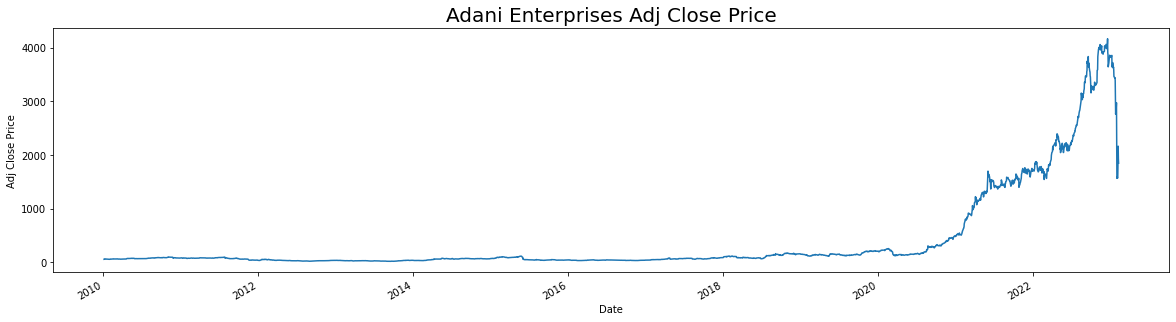

In [12]:
df['Adj Close'].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* In the above plot, if you notice, there is a  increase in the price of stock sometime around 2021

**Let's plot for last 2 years and see the trends**

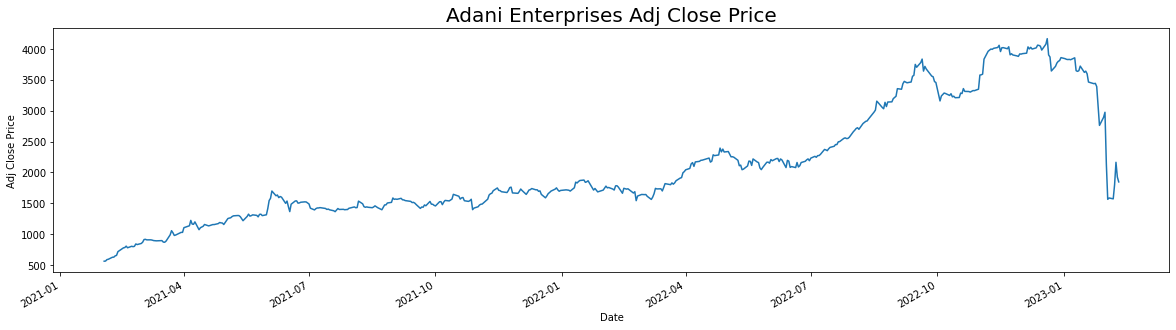

In [13]:
df['Adj Close'].iloc[-504:].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* As the trends of the stock was upwards and suddenly there is a drastic decrese around Jan'21. The main reason for this drastic decrease was Hindenburg report

## **Day-to-day percentage change(Daily returns)**
* Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.

In [14]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2010-01-04 00:00:00+05:30,2010-01-04 00:00:00+05:30,67.01,69.59,66.37,69.22,57.30,1860224,NaN
2010-01-05 00:00:00+05:30,2010-01-05 00:00:00+05:30,69.43,71.11,69.43,70.82,58.62,2280286,2.303665
2010-01-06 00:00:00+05:30,2010-01-06 00:00:00+05:30,70.97,79.24,70.51,77.81,64.41,7326390,9.877175
2010-01-07 00:00:00+05:30,2010-01-07 00:00:00+05:30,79.61,79.61,74.03,74.60,61.75,4759208,-4.129794
2010-01-08 00:00:00+05:30,2010-01-08 00:00:00+05:30,75.07,77.86,73.91,75.54,62.53,3324076,1.263158


In [15]:
# Drop 1st value because it is Nan
df.dropna(axis = 0, inplace = True)

**Plot a graph for daily returns over the priods of 13 years**

Text(0, 0.5, 'Percenatge returns')

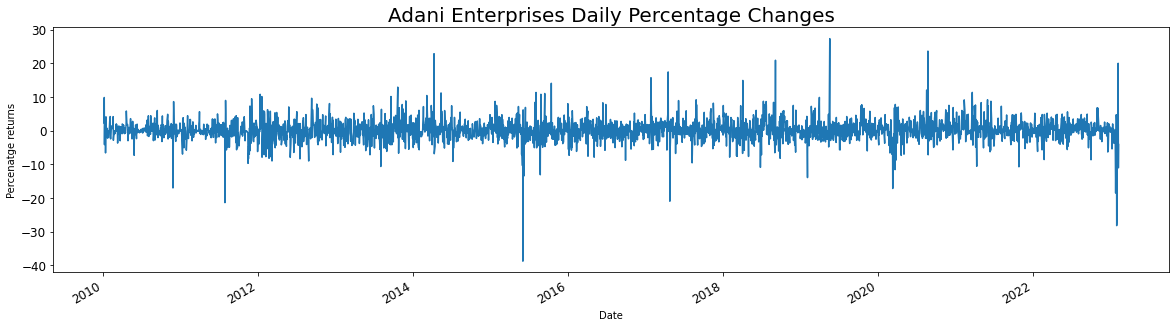

In [16]:
df['Day_Perc_Change'].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with few instance of drastic negative and postive changes

**Plot a graph for daily returns over the priods of 2 years**

Text(0, 0.5, 'Percenatge returns')

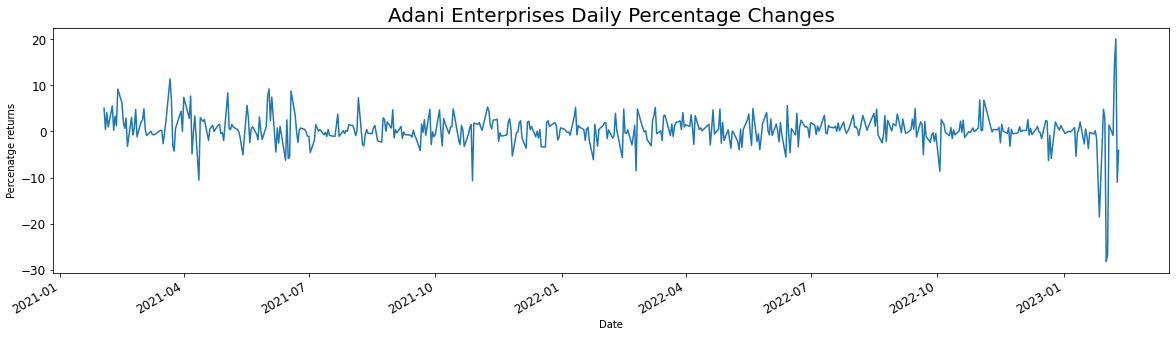

In [17]:
df['Day_Perc_Change'].iloc[-504:].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, in thelast 2 years the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with one instance of drastic negative changes in the month of Jan'23 due to hindenburg report

**Plot daily return distribution histogram**

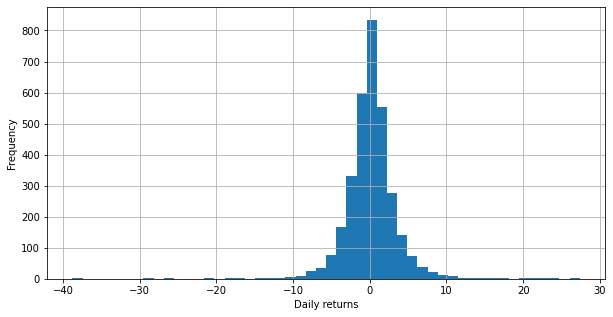

------------------------------------
Basic Statisics for Daily Percentages for 13 years


count    3237.000000
mean        0.161993
std         3.273143
min       -38.749320
25%        -1.309541
50%         0.102775
75%         1.617840
max        27.367529
Name: Day_Perc_Change, dtype: float64

In [18]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 13 years")
df['Day_Perc_Change'].describe()

* The daily returns histogram is centered about origin. For the past 13 years, the mean daily returns has been about 0.161993% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 27.367529% and was 38.749320% in negative direction

**Plot daily return distribution histogram over the priods of 2 years**

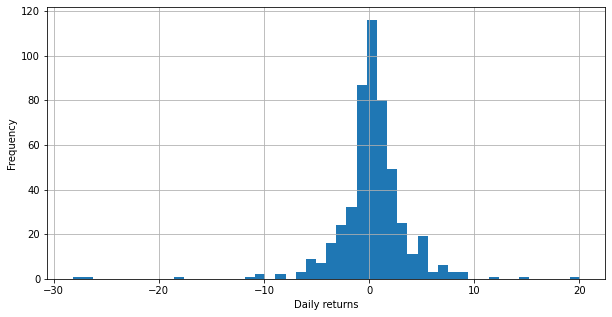

------------------------------------
Basic Statisics for Daily Percentages for 2 years


count    504.000000
mean       0.309905
std        3.496847
min      -28.196980
25%       -0.807568
50%        0.320864
75%        1.591334
max       20.039380
Name: Day_Perc_Change, dtype: float64

In [19]:
df['Day_Perc_Change'].iloc[-504:].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 2 years")
df['Day_Perc_Change'].iloc[-504:].describe()

* The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.309905% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 20.039380% and was 28.196980% in negative direction

## **Trend Analysis**
**Trend is determined from below relationship —**
<center>
<table>
  <tr>
    <th>Daily Percentage Change</th>
    <th>Trend</th>
  </tr>
  <tr>
    <td>-0.5 to 0.5</td>
    <td>Slight or No Change</td>
  </tr>
  <tr>
    <td>0.5 to 1</td>
    <td>Slight Positive</td>
  </tr>
  <tr>
    <td>-0.5 to -1</td>
    <td>Slight Negative</td>
  </tr>
  <tr>
    <td>1 to 3</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>-1 to -3</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>3 to 7</td>
    <td>Among Top Gainers</td>
  </tr>
  <tr>
    <td>-3 to -7</td>
    <td>Among Top Losers</td>
  </tr>
  <tr>
    <td>Above 7</td>
    <td>Bull Run</td>
  </tr>
  <tr>
    <td>Below 7</td>
    <td>Bear Drop</td>
  </tr>
</table>
</center>

In [20]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2010-01-05 00:00:00+05:30,2010-01-05 00:00:00+05:30,69.43,71.11,69.43,70.82,58.62,2280286,2.303665,Positive
2010-01-06 00:00:00+05:30,2010-01-06 00:00:00+05:30,70.97,79.24,70.51,77.81,64.41,7326390,9.877175,Bull run
2010-01-07 00:00:00+05:30,2010-01-07 00:00:00+05:30,79.61,79.61,74.03,74.60,61.75,4759208,-4.129794,Among top losers
2010-01-08 00:00:00+05:30,2010-01-08 00:00:00+05:30,75.07,77.86,73.91,75.54,62.53,3324076,1.263158,Positive
2010-01-11 00:00:00+05:30,2010-01-11 00:00:00+05:30,75.72,77.70,75.72,76.89,63.65,1196678,1.791140,Positive


### **Pie chart**

**Past 13 years trend**

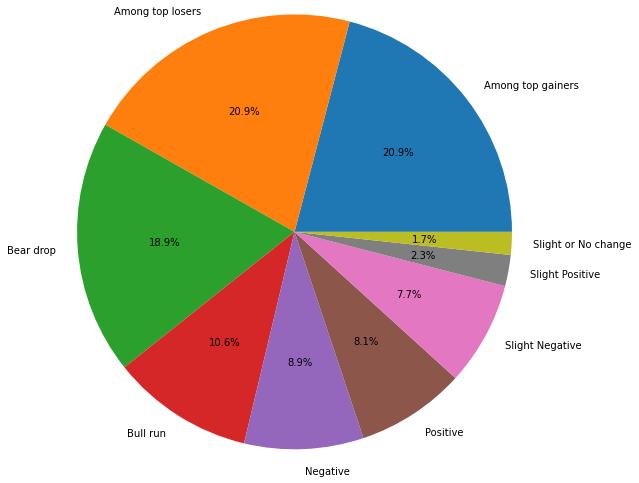

In [21]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 13 yeras period, the ADANI Enterprise stock was among the top gainers for about 20.9% of the time, and among the top losers for 20.9 %. 
* For about 8.1% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.7%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

**Past 2 years trend**

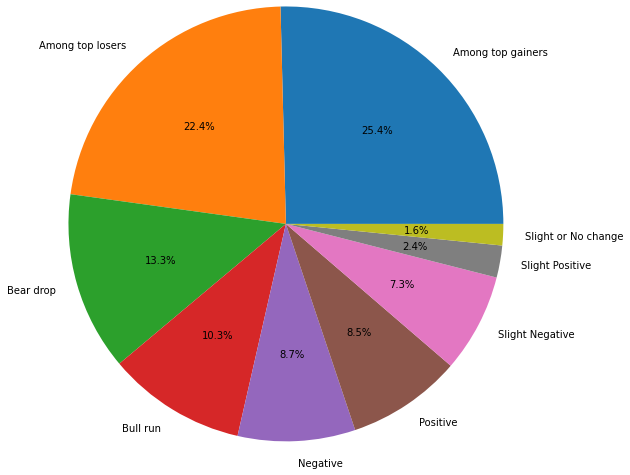

In [22]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].iloc[-504:].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 2 yeras period, the ADANI Enterprise stock was among the top gainers for about 25.4% of the time, and among the top losers for 22.4 %. 
* For about 8.7% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

## **Daily Returns and Volume**

**FOr 13 years period**

<AxesSubplot:xlabel='Date'>

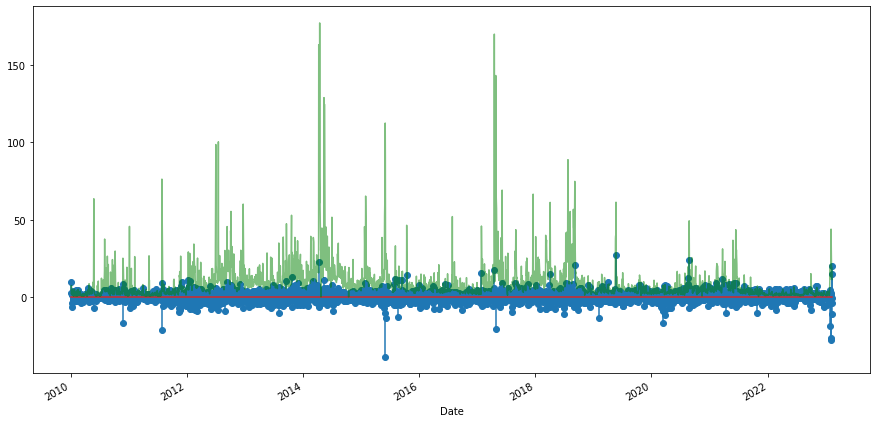

In [23]:
plt.stem(df['Date'], df['Day_Perc_Change'])
(df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

**FOr 2 years period**

<AxesSubplot:xlabel='Date'>

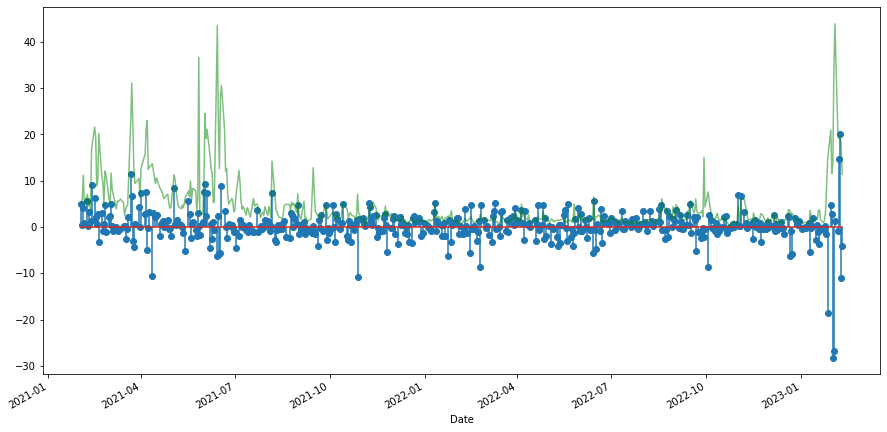

In [24]:
plt.stem(df['Date'].iloc[-504:], df['Day_Perc_Change'].iloc[-504:])
(df['Volume'].iloc[-504:]/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

## **Correlation Analysis Of Stocks with Pair plot and Joint plots**
* “Never put all your eggs in a single basket”

* Whenever we go for the diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson’s correlation coefficient (also called Pearson’s R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you’re at the risk of losing all your investment!

* I selected the aforementioned stocks to perform the correlation analysis. All these stocks are from different segments of Industry and Market cap. You are free to choose the stocks of your interest. the procedure remains the same.


In [25]:
# Adj close price of all the stocks
combined_df = yf.download(["ADANIENT.NS","TATASTEEL.NS","PAGEIND.NS","EICHERMOT.NS","INFY.NS"], start="2010-01-01", end="2023-02-12")['Adj Close']
combined_df = combined_df.round(2)
combined_df.head()

[*********************100%***********************]  5 of 5 completed


,ADANIENT.NS,EICHERMOT.NS,INFY.NS,PAGEIND.NS,TATASTEEL.NS
Date,,,,,
2010-01-04 00:00:00+05:30,57.30,57.19,246.82,753.88,20.36
2010-01-05 00:00:00+05:30,58.62,55.28,247.65,755.41,20.86
2010-01-06 00:00:00+05:30,64.41,54.82,244.03,750.91,20.63
2010-01-07 00:00:00+05:30,61.75,54.05,238.55,759.77,20.88
2010-01-08 00:00:00+05:30,62.53,54.78,232.80,759.55,20.84


### **Pairplot**

<Figure size 1440x360 with 0 Axes>

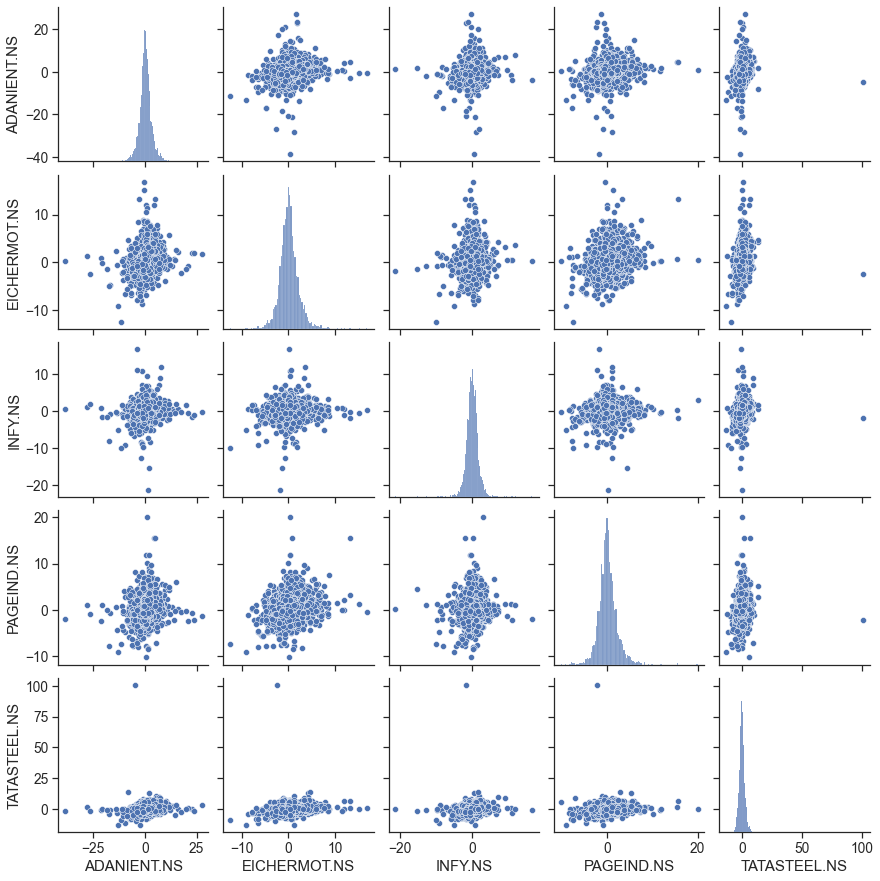

In [26]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize = (20,5))
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

* ***Correlation analysis is performed on the daily percentage change(daily returns) of the stock price and not on the stock price.***
* If you observe carefully, the plots in the lower triangular area are the same as the plots in the upper triangular area with just axes interchanged. So, analyzing either set of plots would suffice. The diagonal represents the histograms, just like the one seen above for ADANI Enterprises stock.
* ADANI ENTERPRISES, EICHER MOTORS , INFY ,PAGEIND and TATASTEEL can be included in a portfolio as no two stocks show any significant correlation.


---


**Drawback of Correlation PLots:**
* Although the pair plots provide very good visualization of all possible combinations between the bunch of stocks, it doesn’t provide any detailed information like Pearson’s R value or null-hypothesis p value to quantify the correlation. That’s where the joint plot comes into the picture!

### **Jointplot**
* While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson’s R value (Pearson’s correlation coefficient) for each pair of stocks. Pearson’s R value ranges from -1 to 1. Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson’s R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

* In addition to Pearson’s R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.



In [ ]:
# Plot the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes_list = [item for sublist in axes for item in sublist]
for i, stock in enumerate(['ADANIENT.NS', 'TATASTEEL.NS', 'PAGEIND.NS', 'EICHERMOT.NS', 'INFY.NS']):
    stock_data = combined_df[combined_df['ADANIENT.NS'] == stock]
    sns.jointplot(x='Date', y='Price', data=stock_data, ax=axes_list[i])

# Show the plot
plt.show()

In [ ]:
# from scipy.stats import stats

# def joint_plot(a,b):
#   g = sns.jointplot(x=pct_chg_df[a], y=pct_chg_df[b], kind='reg', color='royalblue')
#   r, p = stats.pearsonr(pct_chg_df[a], pct_chg_df[b])
#   g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
#   g.ax_joint.scatter(pct_chg_df[a], pct_chg_df[b])
#   g.set_axis_labels(xlabel=a, ylabel=b, size=15)
#   plt.tight_layout()
#   plt.show()
# ax= 0
# for i in range(2):
#   plt.subplot(1, 2,ax+1)
# joint_plot('ADANIENT.NS','EICHERMOT.NS')
# joint_plot('ADANIENT.NS','INFY.NS')
# ax = ax +1
# fig, ax = plt.subplots(nrows=2, ncols=2)

# # plt.subplot(1, 2, 1)
# joint_plot('ADANIENT.NS','EICHERMOT.NS')

# # plt.subplot(1, 2, 2)
# joint_plot('ADANIENT.NS','INFY.NS')
# plt.subplot(2, 2, 3)
# # plot_data(data)

# # plt.subplot(2, 2, 4)
# # plot_data(data)

# plt.tight_layout()
# # plt.show()

In [ ]:
# Plot the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes_list = [item for sublist in axes for item in sublist]
for i, d in enumerate(data[:5]):
    sns.jointplot(x='Date', y='Price', data=d, ax=axes_list[i])

In [ ]:
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # import statsmodels.api as sm

# # def joint_plot(a, b):
# #   g = sns.jointplot(x=pct_chg_df[a], y=pct_chg_df[b], kind='reg', color='royalblue')
# #   r, p = stats.pearsonr(pct_chg_df[a], pct_chg_df[b])
# #   g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
# #   g.ax_joint.scatter(pct_chg_df[a], pct_chg_df[b])
# #   g.set_axis_labels(xlabel=a, ylabel=b, size=15)
# #   plt.tight_layout()
# #   return g

# # def subplot_joint_plots(dataframe, var1, var2, var3):
# #   fig, ax = plt.subplots(1, 3, figsize=(20,6))

# #   joint_plot(var1, var2).ax_joint.set_axis_off()
# #   ax[0].set_title(f"Joint Plot of {var1} vs {var2}")

# #   joint_plot(var2, var3).ax_joint.set_axis_off()
# #   ax[1].set_title(f"Joint Plot of {var2} vs {var3}")

# #   joint_plot(var3, var1).ax_joint.set_axis_off()
# #   ax[2].set_title(f"Joint Plot of {var3} vs {var1}")

# #   plt.show()

# # subplot_joint_plots(pct_chg_df, "ADANIENT.NS", "INFY.NS", "EICHERMOT.NS")
# fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20,10))
# # index = 0
# ax = ax.flatten()
# joint_plot(pct_chg_df, "ADANIENT.NS", "INFY.NS")
# joint_plot(pct_chg_df, "ADANIENT.NS", "INFY.NS")

# # plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def joint_plot(df, a, b):
  g = sns.jointplot(x=df[a], y=df[b], kind='reg', color='royalblue')
  r, p = stats.pearsonr(df[a], df[b])
  g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  g.ax_joint.scatter(df[a], df[b])
  g.set_axis_labels(xlabel=a, ylabel=b, size=15)
  plt.tight_layout()
  return g

# def subplot_joint_plots(df, var1, var2, var3):
#   fig, ax = plt.subplots(1, 3, figsize=(20,6))

#   joint_plot(df, var1, var2).ax_joint.set_axis_off()
#   ax[0].set_title(f"Joint Plot of {var1} vs {var2}")

#   joint_plot(df, var2, var3).ax_joint.set_axis_off()
#   ax[1].set_title(f"Joint Plot of {var2} vs {var3}")

#   joint_plot(df, var3, var1).ax_joint.set_axis_off()
#   ax[2].set_title(f"Joint Plot of {var3} vs {var1}")

#   plt.show()

# subplot_joint_plots(pct_chg_df, "ADANIENT.NS", "INFY.NS", "EICHERMOT.NS")


In [27]:
# Calculate the simple moving average
window_size_1 = 50
rolling_mean_1 = combined_df.rolling(window=window_size_1).mean()

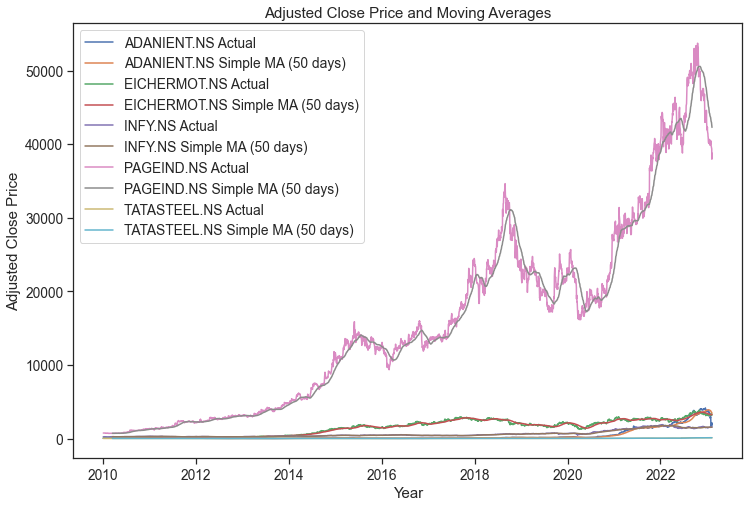

In [29]:
# Plot the moving averages
plt.figure(figsize=(12, 8))
for stock in combined_df.columns:
    plt.plot(combined_df[stock], label=f'{stock} Actual')
    plt.plot(rolling_mean_1[stock], label=f'{stock} Simple MA ({window_size_1} days)')
#     plt.plot(rolling_mean_2[stock], label=f'{stock} Exponential MA ({window_size_2} days)')
plt.legend()
plt.title("Adjusted Close Price and Moving Averages")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

In [30]:
# Calculate the exponential moving average
window_size_2 = 50
rolling_mean_2 = combined_df.ewm(span=window_size_2).mean()

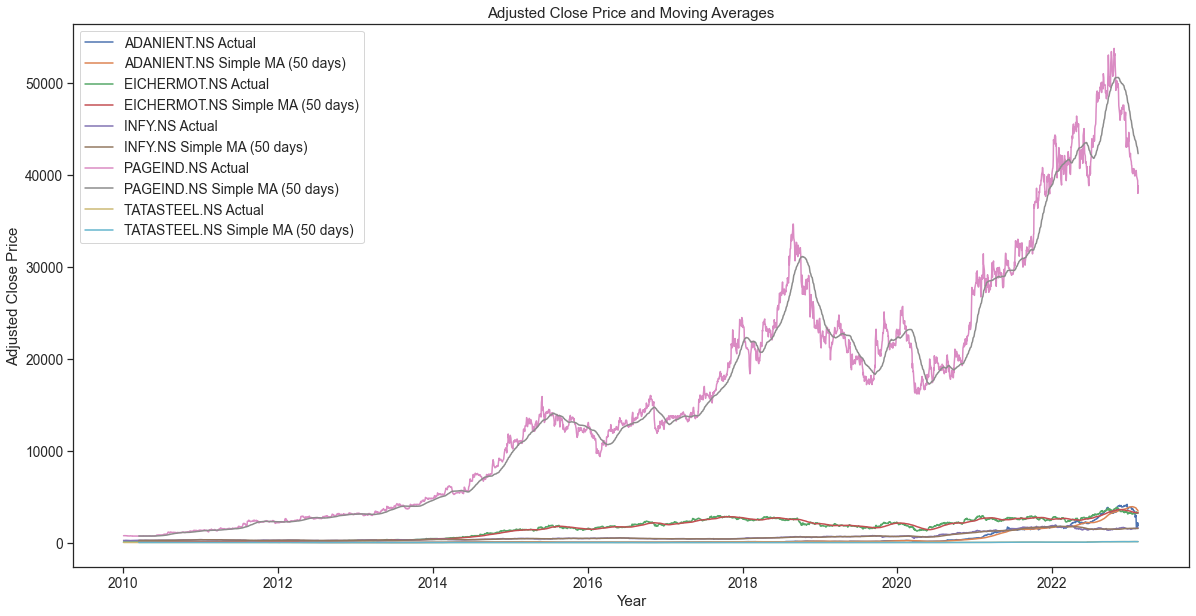

In [31]:
plt.figure(figsize=(20,10))
for stock in combined_df.columns:
    plt.plot(combined_df[stock], label=f'{stock} Actual')
    plt.plot(rolling_mean_1[stock], label=f'{stock} Simple MA ({window_size_1} days)')
plt.legend()
plt.title("Adjusted Close Price and Moving Averages")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

[*********************100%***********************]  1 of 1 completed


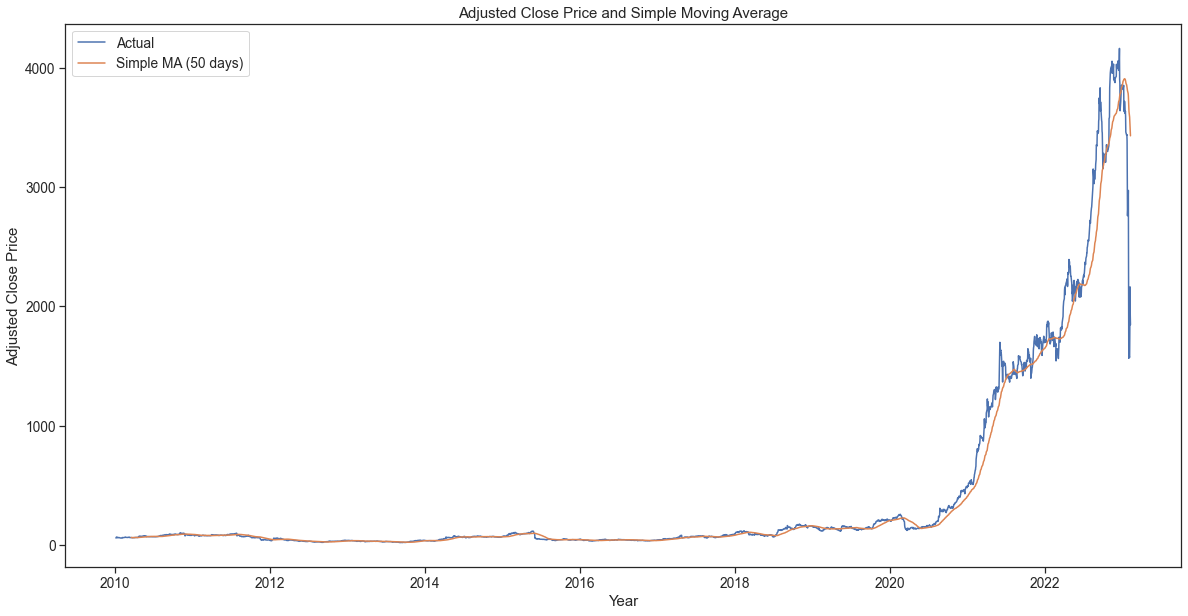

In [36]:

# Download the stock data
stock_data = yf.download("ADANIENT.NS", start="2010-01-01", end="2023-02-12")['Adj Close']

# Calculate the simple moving average
window_size = 50
rolling_mean = stock_data.rolling(window=window_size).mean()

# Plot the moving average
plt.figure(figsize=(20,10))
plt.plot(stock_data, label='Actual')
plt.plot(rolling_mean, label=f'Simple MA ({window_size} days)')
plt.legend()
plt.title("Adjusted Close Price and Simple Moving Average")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

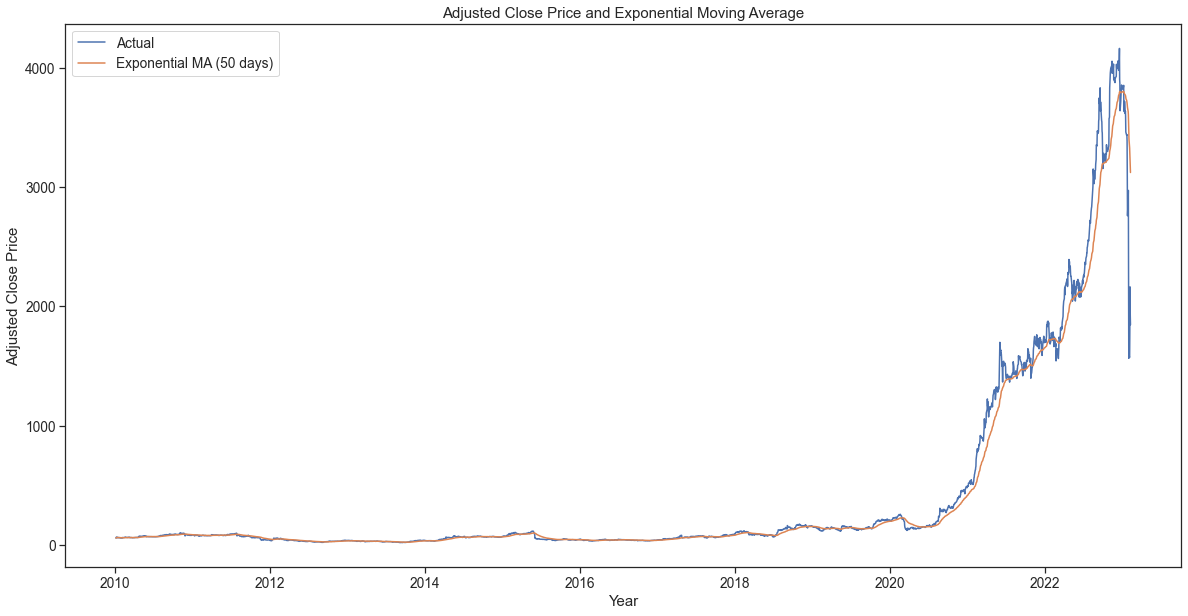

In [40]:
# Calculate the exponential moving average
window_size = 50
rolling_mean = stock_data.ewm(span=window_size).mean()

# Plot the moving average
plt.figure(figsize=(20, 10))
plt.plot(stock_data, label='Actual')
plt.plot(rolling_mean, label=f'Exponential MA ({window_size} days)')
plt.legend()
plt.title("Adjusted Close Price and Exponential Moving Average")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

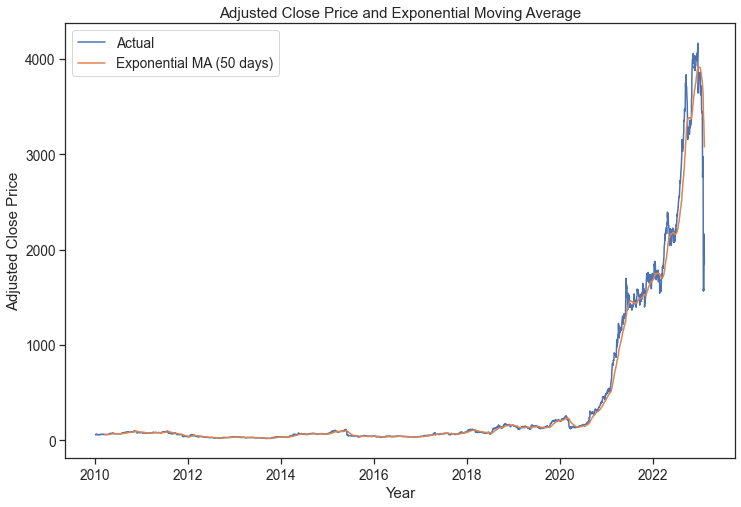

In [45]:
# Calculate the exponential moving average
window_size = 50
exp_weights = pd.Series(range(1, window_size+1), index=range(window_size))
exp_weights = exp_weights.apply(lambda x: x/exp_weights.sum())
rolling_mean = stock_data.rolling(window=window_size).apply(lambda x: (x*exp_weights).sum(), raw=True)

# Plot the moving average
plt.figure(figsize=(12, 8))
plt.plot(stock_data, label='Actual')
plt.plot(rolling_mean, label=f'Exponential MA ({window_size} days)')
plt.legend()
plt.title("Adjusted Close Price and Exponential Moving Average")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

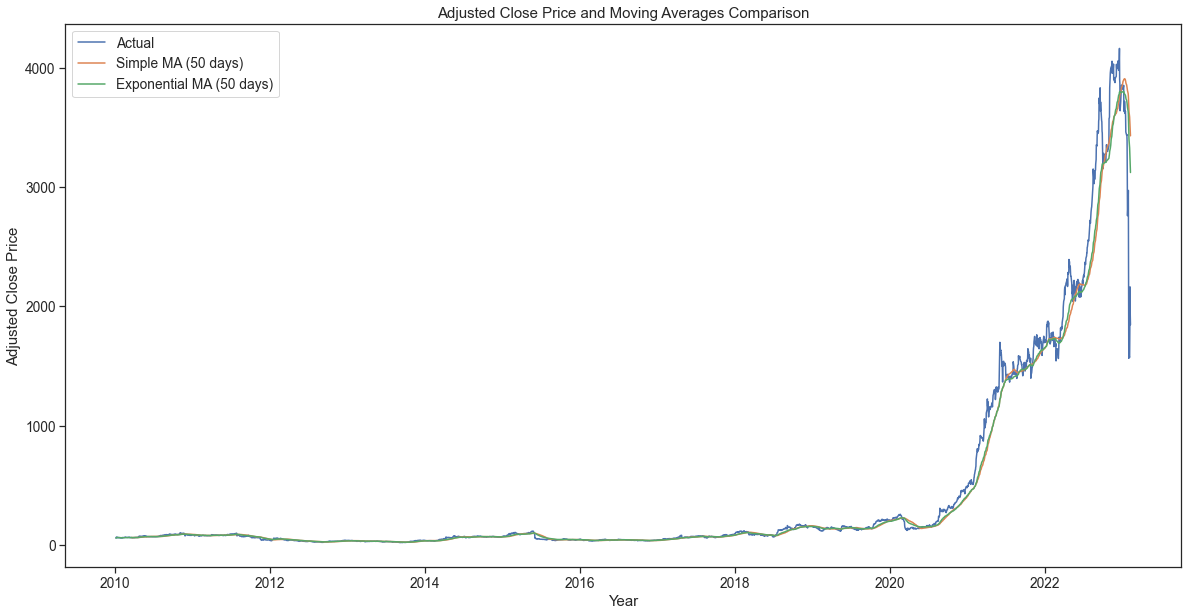

In [46]:
# Calculate the simple moving average
window_size = 50
simple_mean = stock_data.rolling(window=window_size).mean()

# Calculate the exponential moving average
exp_mean = stock_data.ewm(span=window_size).mean()

# Plot the comparison
plt.figure(figsize=(20,10))
plt.plot(stock_data, label='Actual')
plt.plot(simple_mean, label=f'Simple MA ({window_size} days)')
plt.plot(exp_mean, label=f'Exponential MA ({window_size} days)')
plt.legend()
plt.title("Adjusted Close Price and Moving Averages Comparison")
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.show()

##### In the plot, you can see that the simple moving average (in blue) is smoother and slower to react to changes in the stock price compared to the exponential moving average (in orange). This is because the simple moving average takes the average of all the stock prices within the window and gives each price the same weight, while the exponential moving average assigns more weight to recent prices, making it more responsive to changes in the stock price.

##### From the plot, it can be seen that the exponential moving average tends to follow the actual stock price more closely than the simple moving average. This is because the exponential moving average gives more weight to recent prices, which can be more relevant in quickly changing market conditions.

In [48]:
combined_df.head()

,ADANIENT.NS,EICHERMOT.NS,INFY.NS,PAGEIND.NS,TATASTEEL.NS,50_day_MA
Date,,,,,,
2010-01-04 00:00:00+05:30,57.30,57.19,246.82,753.88,20.36,NaN
2010-01-05 00:00:00+05:30,58.62,55.28,247.65,755.41,20.86,NaN
2010-01-06 00:00:00+05:30,64.41,54.82,244.03,750.91,20.63,NaN
2010-01-07 00:00:00+05:30,61.75,54.05,238.55,759.77,20.88,NaN
2010-01-08 00:00:00+05:30,62.53,54.78,232.80,759.55,20.84,NaN


In [ ]:
df['Day_Perc_Change'].iloc[-504:].describe()

In [ ]:
#Our web application will be based on close price

In [ ]:
plt.plot(df['Close'])

In [ ]:
# Moving Average of 100 days
ma100 = df['Close'].rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')

In [ ]:
# Moving average of 200 days
ma200 = df['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma200,'g')

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
data_training.shape

In [ ]:
data_testing.shape

In [ ]:
df.shape

In [ ]:
data_training.head()

In [ ]:
data_testing.tail()

In [ ]:
#Scaling down the data for LSTM model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
# Splitting int train and test
X_train = []
y_train = []
# Price on 11th day is dependent on previoud day price. Steps = 100 daya here
# For first 100 days will be feature (X_train) and next day will be y_train
# After each step steps, it will forget  one data
# (34 36 33 40 39 38 37 42 44 38) --X_train (11th day)--y_train

In [ ]:
for i in range(100, data_training.shape[0]):
  X_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

In [ ]:
# ML model creation
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 50)

In [ ]:
model.save('keras_model.h5')

In [ ]:
#We have to append last 100 days data from the training dataset to predict the value for testing data
# Because for index 2290, no previous data is available
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
# Scaline down the test data
input_data = scaler.transform(final_df)

In [ ]:
input_data.shape

In [ ]:
X_test = []
y_test = [] 

In [ ]:
for i in range(100, input_data.shape[0]):
  X_test.append(data_training_array[i-100:i])
  y_test.append(data_training_array[i,0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test.shape

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
y_test.shape

In [ ]:
# Scaling up the value because it was scaled down
scale_factor = 1/scaler.scale_
y_pred = y_pred *scale_factor
y_test = y_test *scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# import pickle
# pickle.dump(model, open('keras_model.pkl','wb'))

# model = pickle.load(open('model.pkl','rb'))

In [ ]:
import keras
print(keras.__version__)